# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

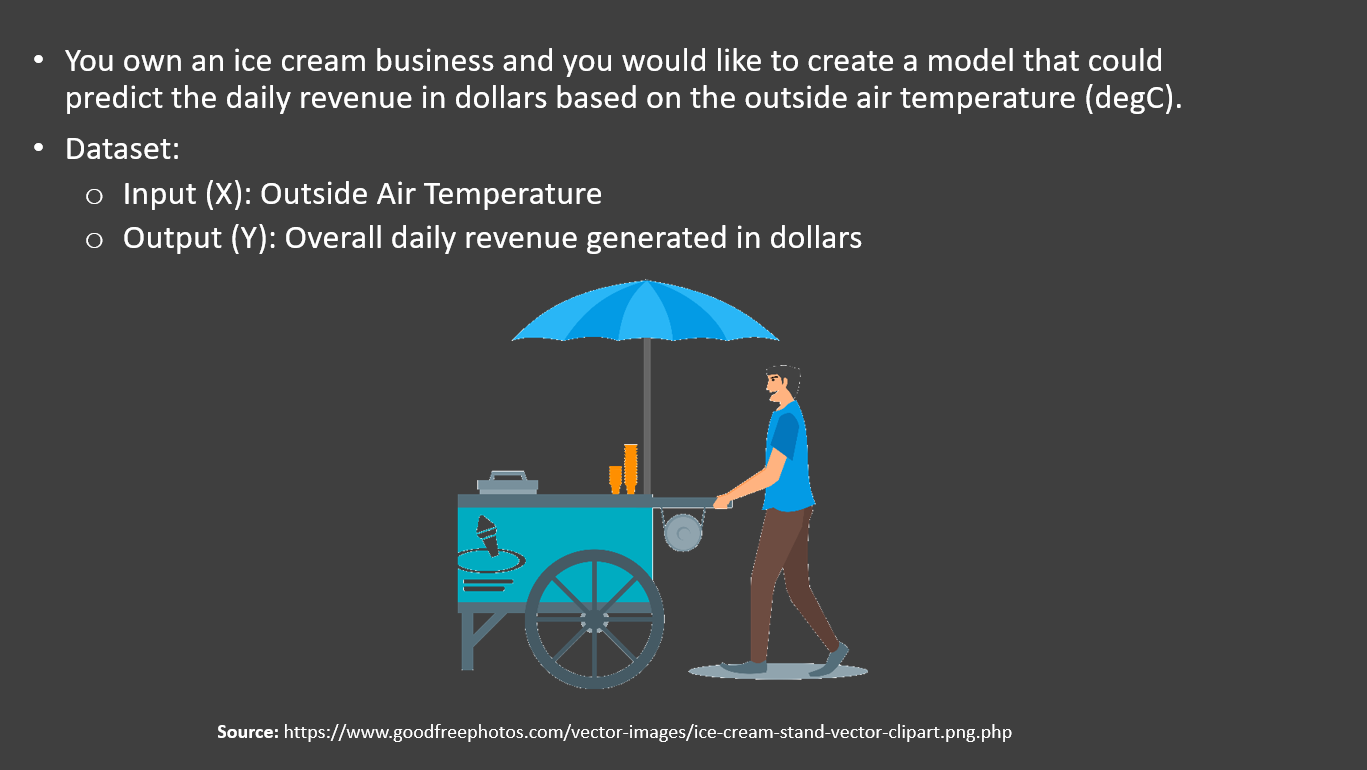

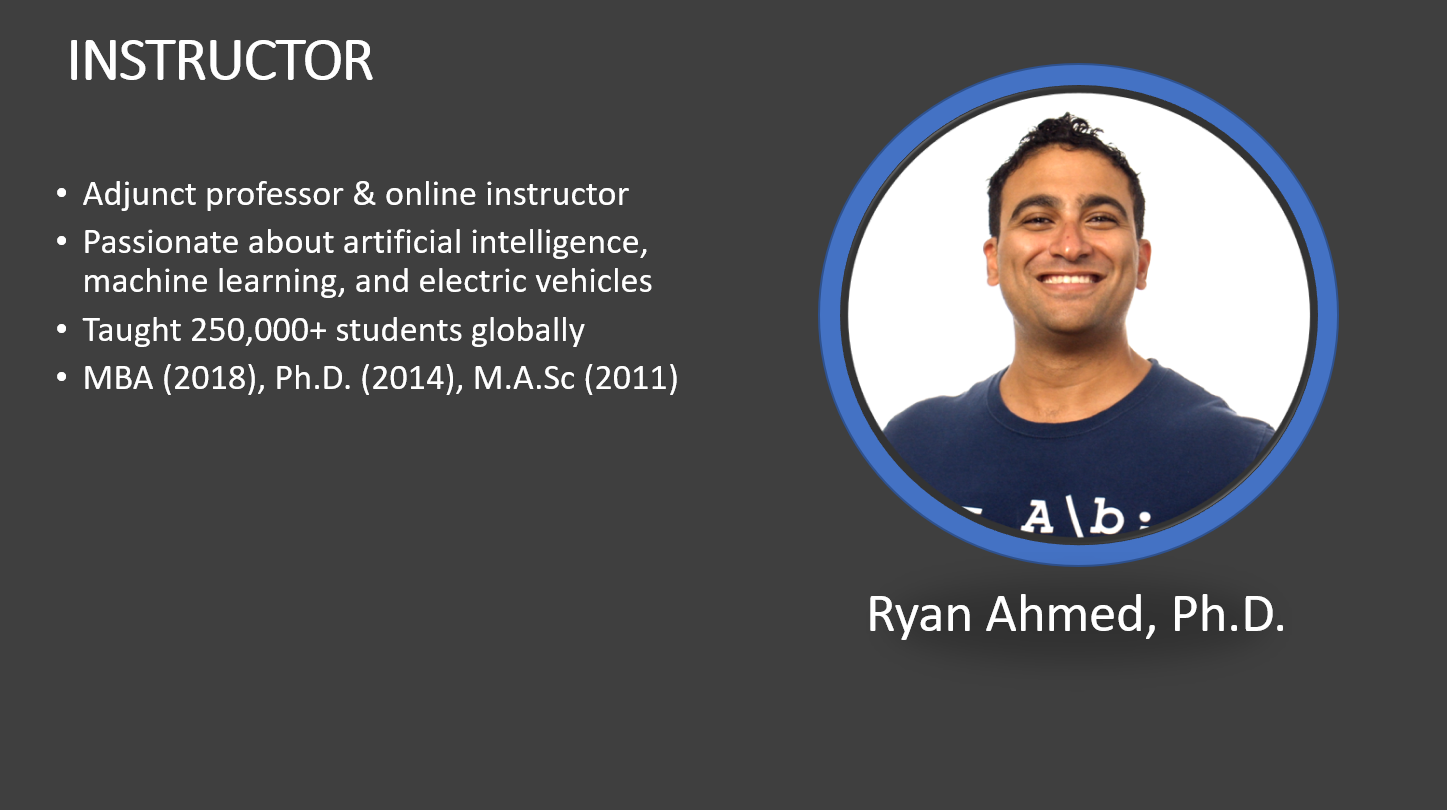

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [4]:
sales_df = pd.read_csv('IceCreamData.csv')

In [5]:
sales_df

Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]

In [6]:
sales_df.head()

Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194

In [7]:
sales_df.tail()

Temperature     Revenue
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
sales_df.describe()

Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Calculate the average and maximum temperature and revenue using an alternative method**

In [10]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

In [11]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

# TASK #3: PERFORM DATA VISUALIZATION

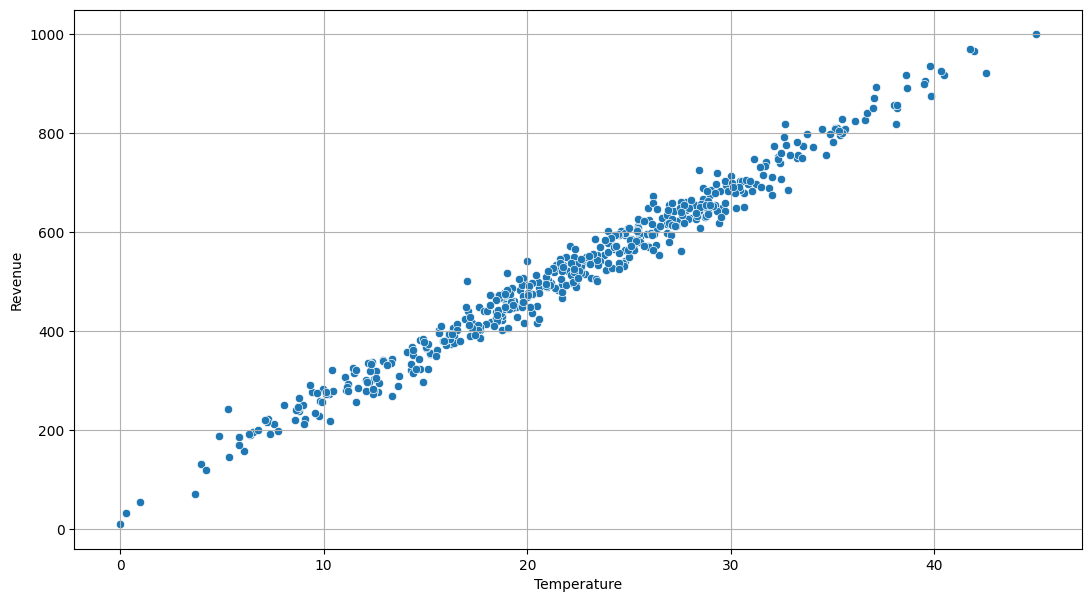

In [13]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid()

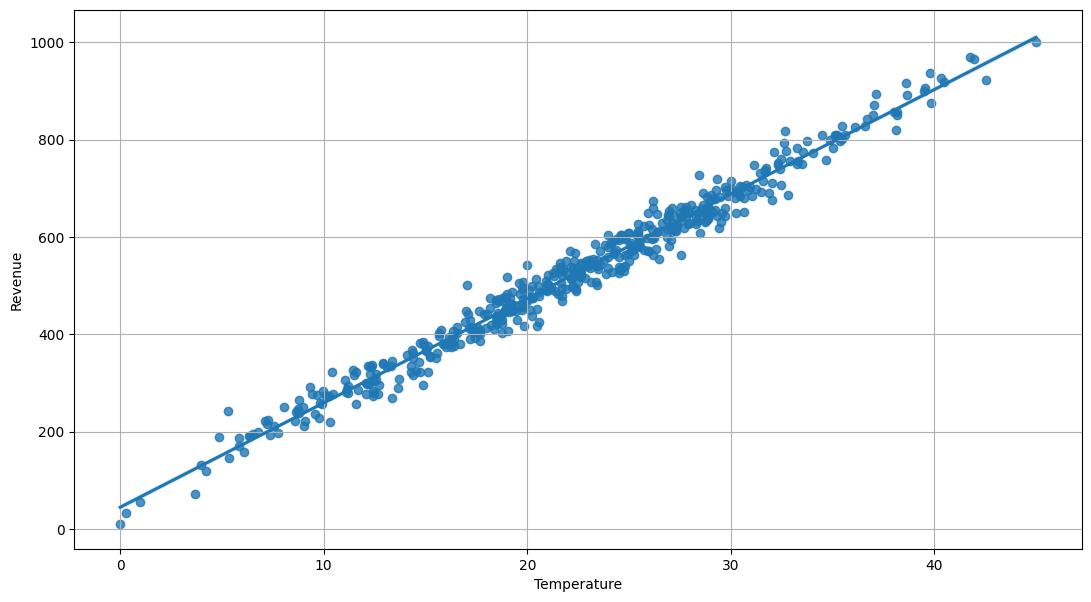

In [14]:
plt.figure(figsize = (13, 7))
sns.regplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid()

# TASK #4: CREATE TESTING AND TRAINING DATASET

In [15]:
sales_df

Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]

In [16]:
X = sales_df['Temperature']
y = sales_df['Revenue']

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X_train.shape

(400, 1)

In [22]:
y_train.shape

(400, 1)

In [23]:
X_test.shape

(100, 1)

In [24]:
y_test.shape

(100, 1)

**PRACTICE OPPORUNITY #2 [OPTIONAL]:**
- **Change the split ratio to allocate 30% for testing and 70% for training.**
- **Confirm that the train test split process is successful.**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [27]:
X_train.shape

(350, 1)

In [28]:
X_test.shape

(150, 1)

In [29]:
y_train.shape

(350, 1)

In [30]:
y_test.shape

(150, 1)

# TASK #5: UNDERSTAND THEORY BEHIND SIMPLE LINER REGRESSION 

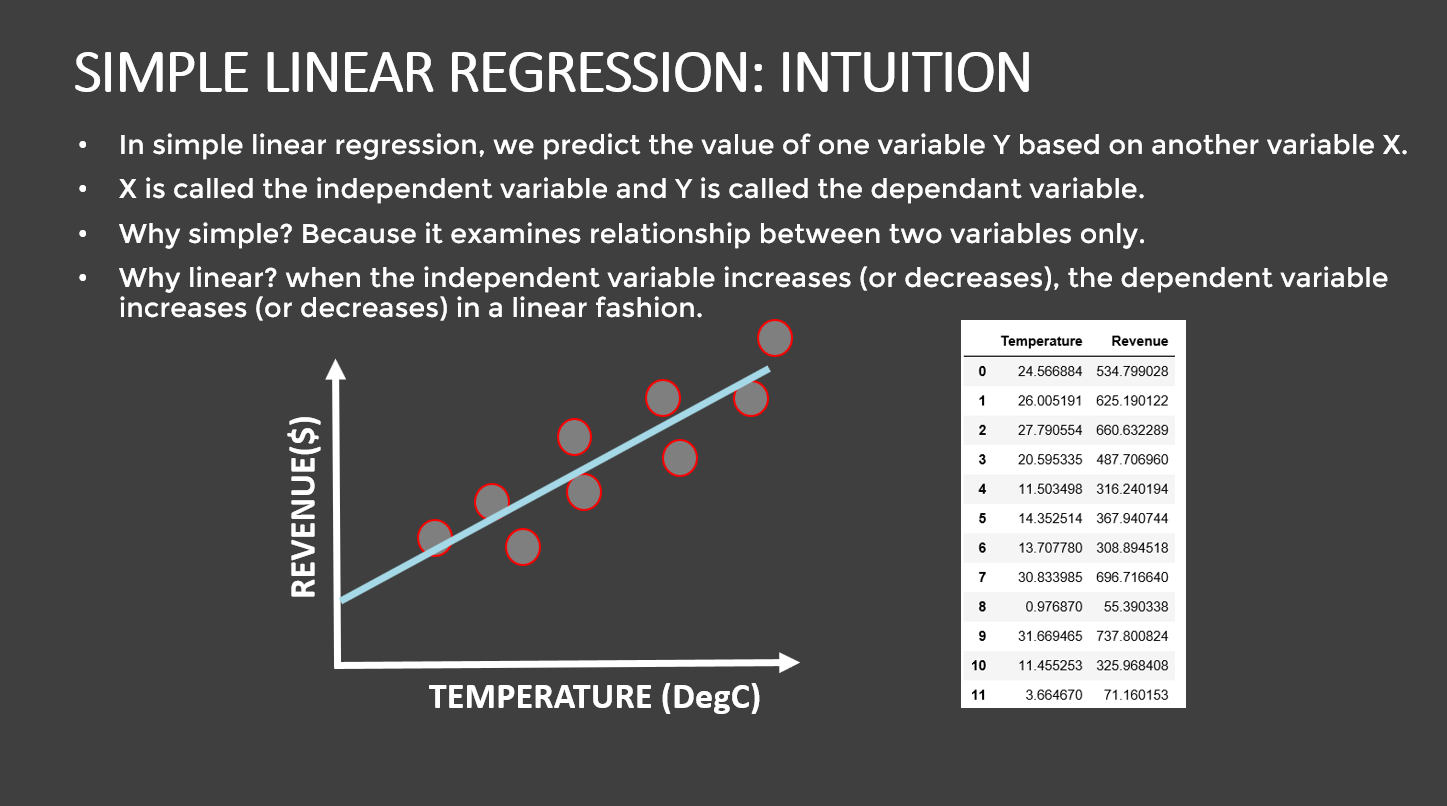

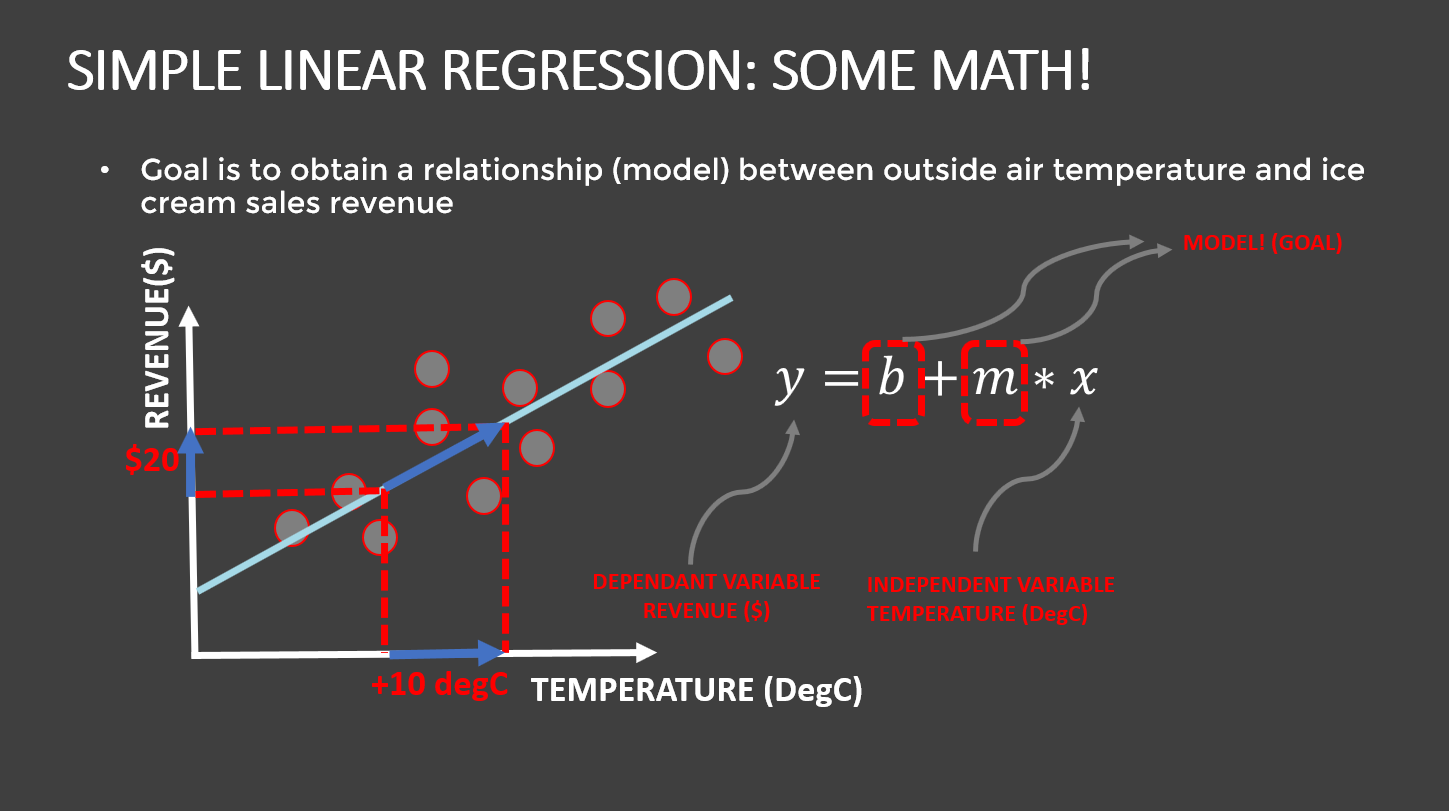

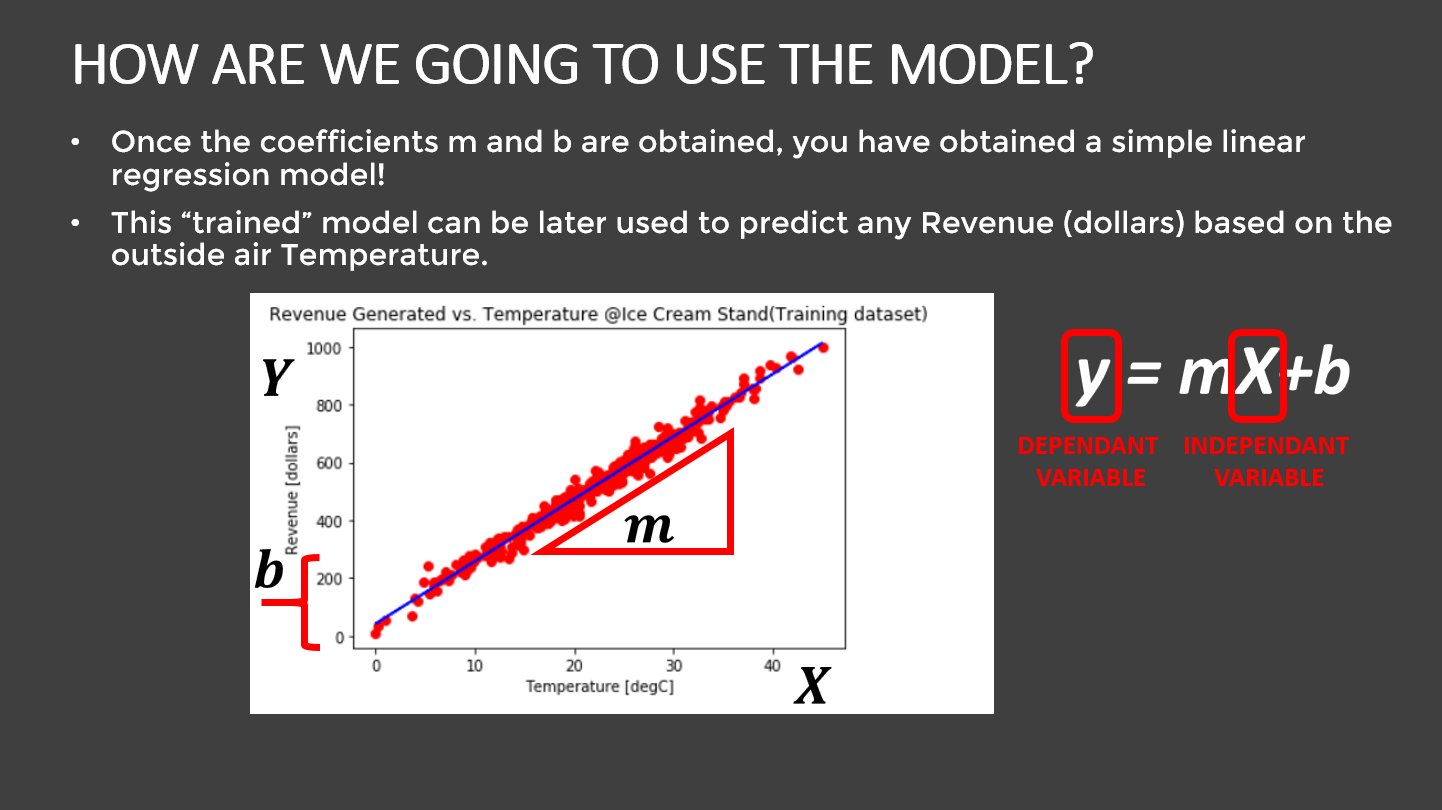

# TASK #6: TRAIN A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [32]:
X_train.shape

(400, 1)

In [33]:
y_train.shape

(400, 1)

In [38]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept = True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [39]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[21.51640529]]
Linear Model Coeff(b) [42.23085294]


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Set the fit_intercept attribute to False and retrain the model. What do you notice? comment on the result.**

In [36]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept = False)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [37]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[23.19112043]]
Linear Model Coeff(b) 0.0


# TASK #7: EVALUATE TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

Text(0.5, 1.0, 'Revenue Generated vs. Temperature')

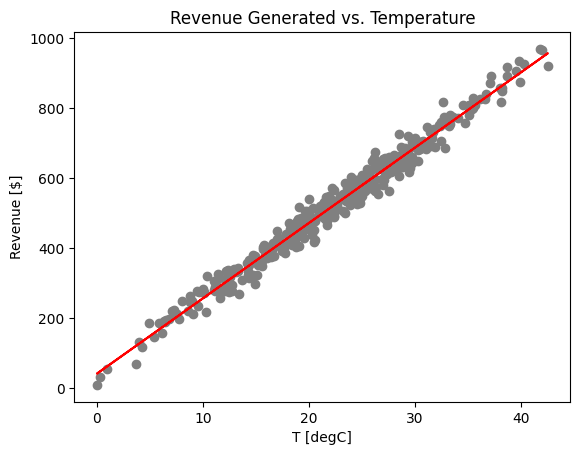

In [40]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color = 'r')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Revenue Generated vs. Temperature')

In [41]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.9791285368898863

Text(0.5, 1.0, 'Revenue Generated vs. Temperature')

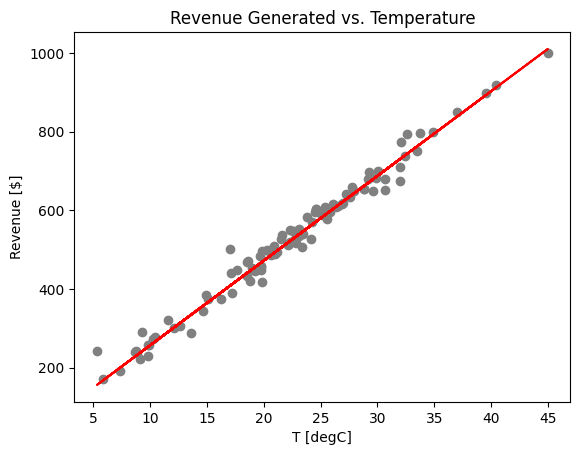

In [42]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color = 'r')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Revenue Generated vs. Temperature')

In [43]:
# Use the trained model to generate predictions

Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)


Revenue Predictions = [[472.55895867]]


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Try at least 3 temperature values and record the output**
- **Perform a sanity check and comment on your results!**

In [44]:
Temp1 = np.array([5])
Temp1 = Temp1.reshape(-1,1)

Revenue1 = SimpleLinearRegression.predict(Temp1)
print('Revenue Prediction1 =', Revenue1)

Temp2 = np.array([15])
Temp2 = Temp2.reshape(-1,1)

Revenue2 = SimpleLinearRegression.predict(Temp2)
print('Revenue Prediction2 =', Revenue2)

Temp3 = np.array([40])
Temp3 = Temp3.reshape(-1,1)

Revenue3 = SimpleLinearRegression.predict(Temp3)
print('Revenue Prediction3 =', Revenue3) 

Revenue Prediction1 = [[149.81287937]]
Revenue Prediction2 = [[364.97693223]]
Revenue Prediction3 = [[902.88706439]]


# EXCELLENT JOB

# PRACTICE OPPORTUNITIES SOLUTION

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Calculate the average and maximum temperature and revenue using an alternative method**

In [26]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

In [27]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

**PRACTICE OPPORUNITY #2 SOLUTION:**
- **Change the split ratio to allocate 30% for testing and 70% for training.**
- **Confirm that the train test split process is successful.**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [29]:
X_train.shape

(350, 1)

In [30]:
y_train.shape

(350, 1)

In [31]:
X_test.shape

(150, 1)

In [32]:
y_test.shape

(150, 1)

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Set the fit_intercept attribute to False and retrain the model. What do you notice? comment on the result.**

In [33]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept = False)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Try at least 3 temperature values and record the output**
- **Perform a sanity check and comment on your results!**

In [34]:
# Temp = 5, Revenue = $150
# Temp = 20, Revenue = $474
# Temp = 40, Revenue = $905